In [3]:
# Module 4 Assignment - Model development using Linear regression analytic technique
# Kingsley Edionwe
# Learners ID: 157398

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Step 1: Load the dataset
file_path = r"C:\Users\kings\OneDrive\Desktop\NXU\Class\BAN6800\New folder\Module 3\Cleaned_dataset.csv"
data = pd.read_csv(file_path)

In [6]:
# Step 2: Understand the dataset
print("Dataset shape:", data.shape)
print("Dataset info:")
print(data.info())
print("First 5 rows:")
print(data.head())
print("Summary statistics:")
print(data.describe())

Dataset shape: (17, 19)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer ID           17 non-null     object 
 1   First Name            17 non-null     object 
 2   Last Name             17 non-null     object 
 3   Address               17 non-null     object 
 4   Email Address         17 non-null     object 
 5   Book ID               17 non-null     object 
 6   Title                 17 non-null     object 
 7   Author Full Name      17 non-null     object 
 8   Publication Date      17 non-null     object 
 9   Quantity Available    17 non-null     int64  
 10  Order ID              17 non-null     object 
 11  Customer ID.1         17 non-null     object 
 12  Book ID.1             17 non-null     object 
 13  Date Purchased        17 non-null     object 
 14  Amount Paid           17 non-null     

In [7]:
# Step 3: Data cleaning and preprocessing (if needed)
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
Customer ID             0
First Name              0
Last Name               0
Address                 0
Email Address           0
Book ID                 0
Title                   0
Author Full Name        0
Publication Date        0
Quantity Available      0
Order ID                0
Customer ID.1           0
Book ID.1               0
Date Purchased          0
Amount Paid             0
Quantity                0
Order Status            0
Shipping Address        0
Amount Paid per Unit    0
dtype: int64


In [8]:
# Drop rows with missing values (or handle as needed)
data_clean = data.dropna()

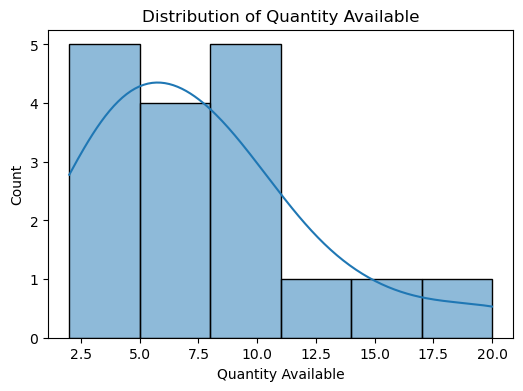

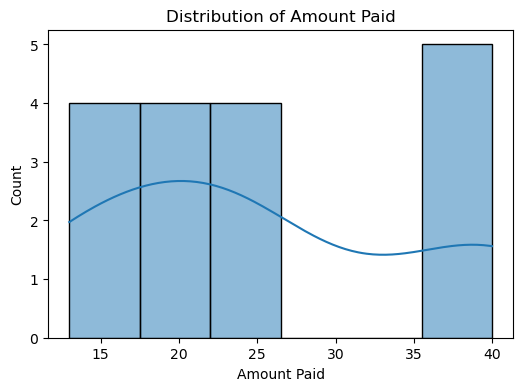

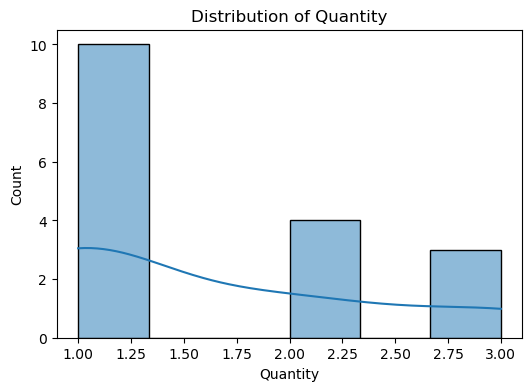

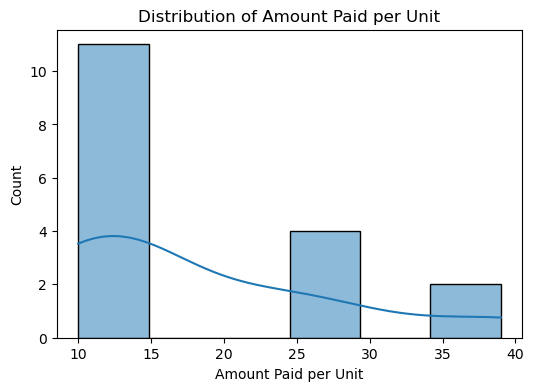

In [9]:
# Step 4: Exploratory Data Analysis (EDA)
# Visualize distributions of numerical variables
numerical_cols = data_clean.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [10]:
# Assuming data_clean is already defined and cleaned
# Select only numeric columns for correlation
numeric_data = data_clean.select_dtypes(include=['number'])

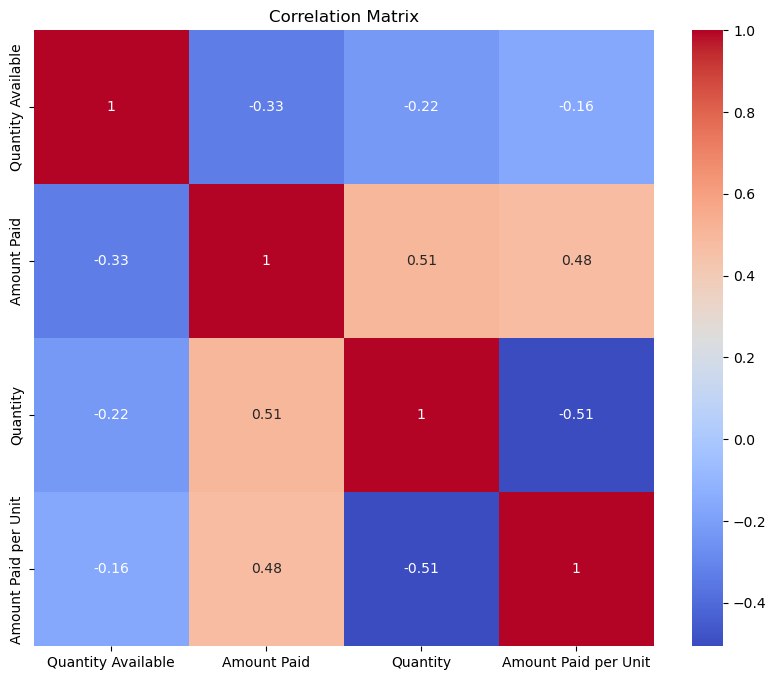

In [11]:
# Visualize correlations
plt.figure(figsize=(10, 8))
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Step 5: Feature selection
# The target variable is the last numerical column
target = numerical_cols[-1]
features = numerical_cols.copy()
features.remove(target)

X = data_clean[features]
y = data_clean[target]

In [13]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Step 7: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Step 8: Model development - Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
# Step 9: Model evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 1.6592
R-squared: 0.9886


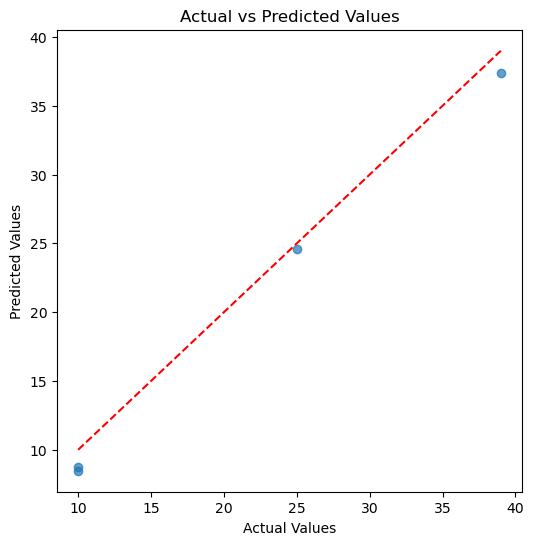

In [17]:
# Step 10: Visualize actual vs predicted values
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()